<font size="+3"><strong>Titanic - Machine Learning from Disaster </strong></font>

The project is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this projet, we are going to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

# Importation of libraries

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
from sklearn.pipeline import make_pipeline, Pipeline
from category_encoders import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


# Data Importation and Preparation/Cleaning

## Create a "data_wranging" function

In [21]:
def data_wrangling(filepath):
    # import "csv file" into DataFrame
    df = pd.read_csv(filepath, index_col = "PassengerId")
    
    # Dropping Low and High cardinality columns
    drop_cols =  ["Name", "Ticket", "Cabin", "Embarked"]
    df = df.drop(columns = drop_cols)
    
    return df

In [26]:
df = data_wrangling("train.csv")

In [27]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

# Split Dataset into Feature Matrix and Target Vector

In [51]:
X_train = df.drop(columns = "Survived")

In [52]:
y_train = df["Survived"]

# Model selection and Building

In [57]:
model = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy="mean"),
    StandardScaler(),
    RandomForestClassifier(random_state=42)
)
model.fit(X_train,y_train
         )

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Sex'],
                                mapping=[{'col': 'Sex', 'data_type': dtype('O'),
                                          'mapping': male      1
female    2
NaN      -2
dtype: int64}])),
                ('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

## Calculate the accuracy of the Model using train_dataset

In [54]:
model.score(X_train, y_train)

0.9809203142536476

array([0.08364522, 0.26564807, 0.26756316, 0.04772491, 0.03795474,
       0.2974639 ])

# Testing the built Model

## Import test dataset

In [28]:
X_test = data_wrangling("test.csv")

0.9809203142536476

### Make Predictions using test dataset

In [31]:
predictions = model.predict(X_test)

In [65]:
importances = model.named_steps["randomforestclassifier"].feature_importances_

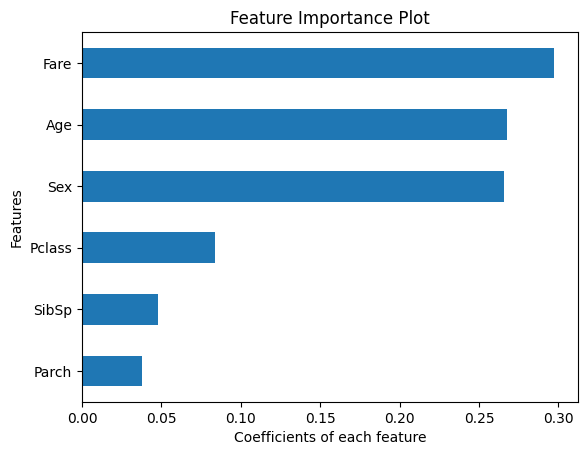

In [72]:
feat_imp = pd.Series(importances, index = X_test.columns, name = "Feature_importances").sort_values()
feat_imp.plot(kind = "barh")
plt.title("Feature Importance Plot")
plt.xlabel("Coefficients of each feature")
plt.ylabel("Features");

Create a DataFrame using "PassengerId" and Prediction values from test dataset

In [73]:
sub = pd.DataFrame(
    {"PassengerId": X_test.index, "Survived": predictions}
)

In [74]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0


Convert Dataframe to "CSV" file.

In [75]:
sub.to_csv("submission.csv", index = False)